In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace= True)
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [5]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state=43)

C:\Users\user\AppData\Local\Temp\ipykernel_15424\2029331016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


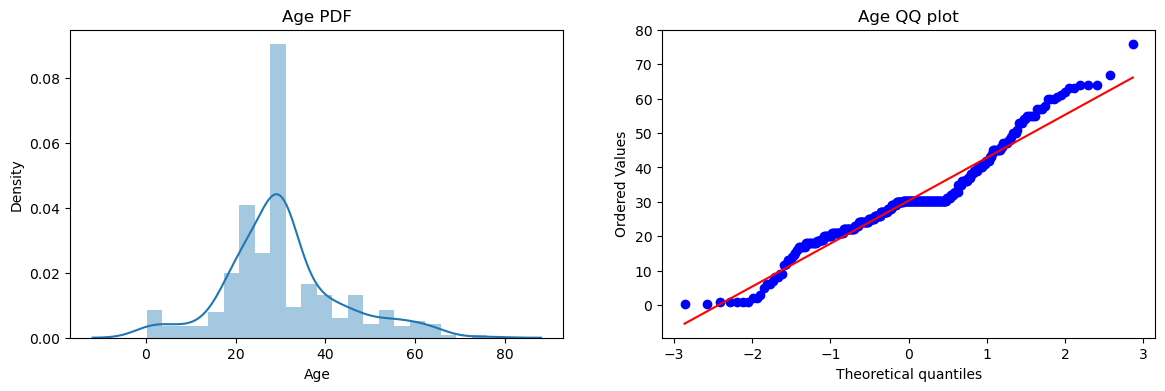

In [7]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot = plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15424\4007407130.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


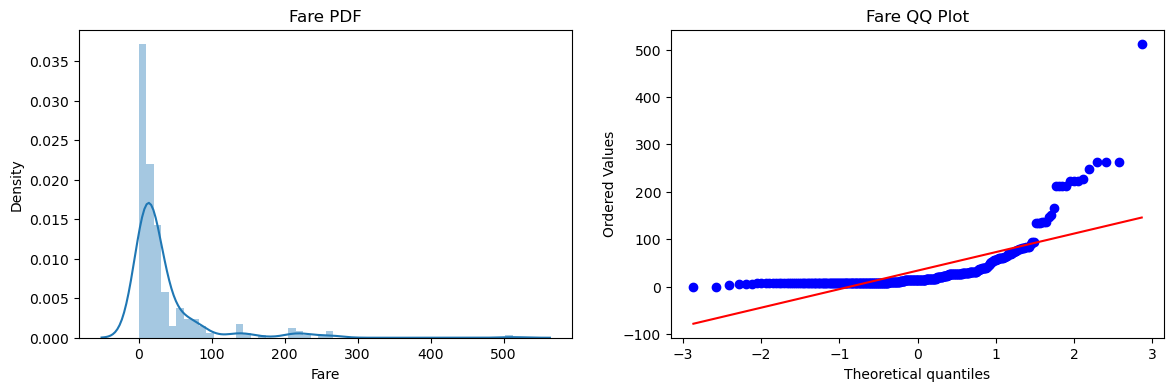

In [8]:
plt.figure(figsize =(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
    
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7261904761904762
Accuracy DT 0.6547619047619048


In [13]:
trf = FunctionTransformer(func = np.log1p)

In [15]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.75
Accuracy DT 0.6547619047619048


In [18]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.593321718931475


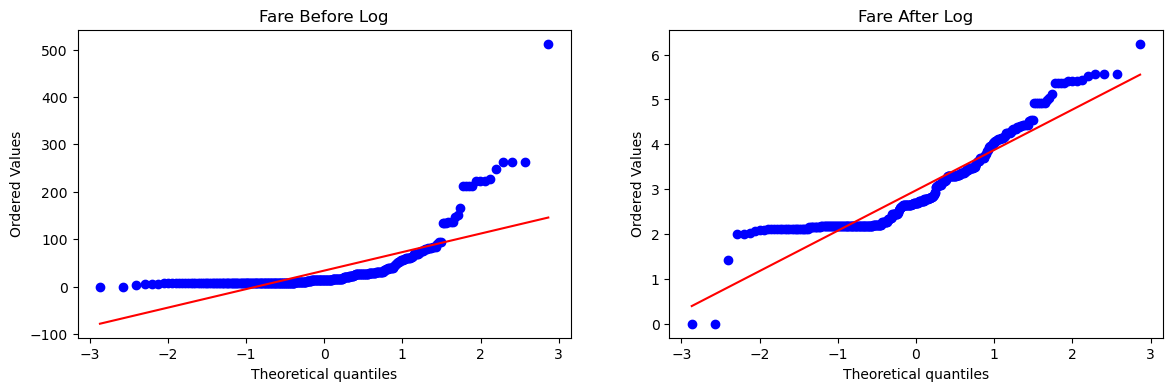

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

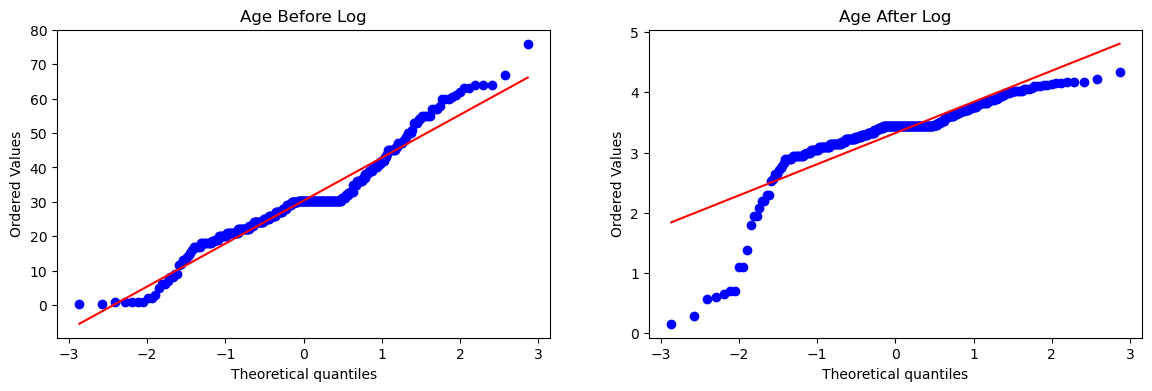

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [21]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.75
Accuracy DT 0.6428571428571429


In [23]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6507549361207897
DT 0.583855981416957


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6363530778164923


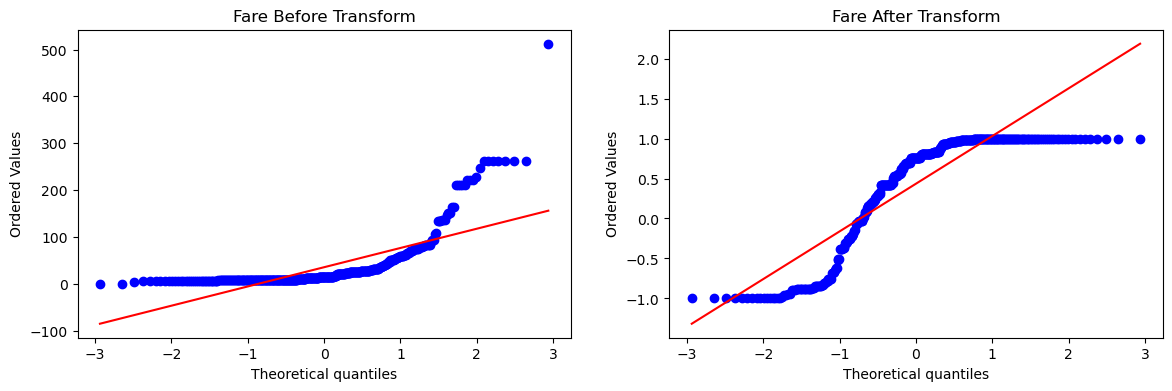

In [25]:
apply_transform(np.sin)